## Detect cycle in a directed graph 
Medium Accuracy: 27.88%Submissions: 360K+Points: 4
Get Internship at GfG by submitting your Entries in: Data Science Blogathon


Given a Directed Graph with V vertices (Numbered from 0 to V-1) and E edges, check whether it contains any cycle or not.


Example 1:

Input:
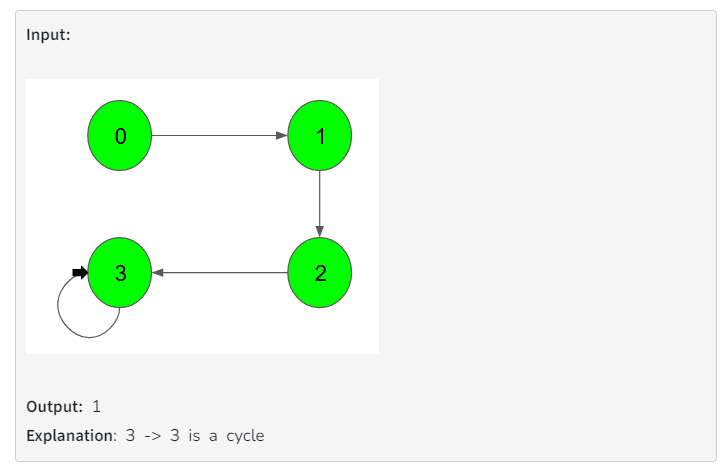

Output: 1
Explanation: 3 -> 3 is a cycle

Example 2:

>Input:
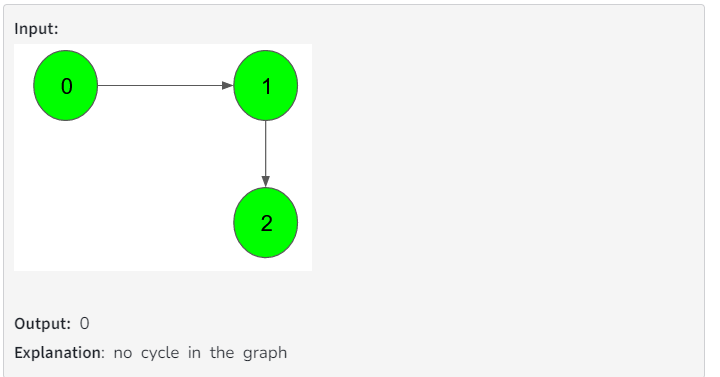


Output: 0  
Explanation: no cycle in the graph  

Your task:  
You dont need to read input or print anything. Your task is to complete the function isCyclic() which takes the integer V denoting the number of vertices and adjacency list adj as input parameters and returns a boolean value denoting if the given directed graph contains a cycle or not.  
In the adjacency list adj, element adj[i][j] represents an edge from i to j.  


Expected Time Complexity: O(V + E)
Expected Auxiliary Space: O(V)


Constraints:
1 ≤ V, E ≤ 105  


 ## Kahn’s Algorithm(Topological Sorting Using BFS).
#### Intuition:

Since we know topological sorting is only possible for directed acyclic graphs(DAGs) if we apply Kahn’s algorithm in a directed cyclic graph(A directed graph that contains a cycle), it will fail to find the topological sorting(i.e. The final sorting will not contain all the nodes or vertices).   
<b> So, finally, we will check the sorting to see if it contains all V vertices or not. If the result does not include all V vertices, we can conclude that there is a cycle.  </b>

 Note: The intuition is to check the size of the final topological sorting if it equals V(no. of vertices or nodes) or not.

##### Let’s quickly understand why Kahn’s Algorithm will fail for a directed cyclic graph.

<b> If a directed graph contains a cycle </b>, the <b> indegree of the nodes that are parts of that cycle will never be 0 </b> due to the cyclic dependency. <b> But in that algorithm, we push a node into the queue only if its in-degree becomes 0 </b>. So, those nodes of the cycle will never be pushed into the queue as well as included in the topological sorting. And  <b> here it violates the rules of topological sorting as topological sorting is a linear ordering of all V vertices </b> (i.e. All V vertices must be present in that ordering).


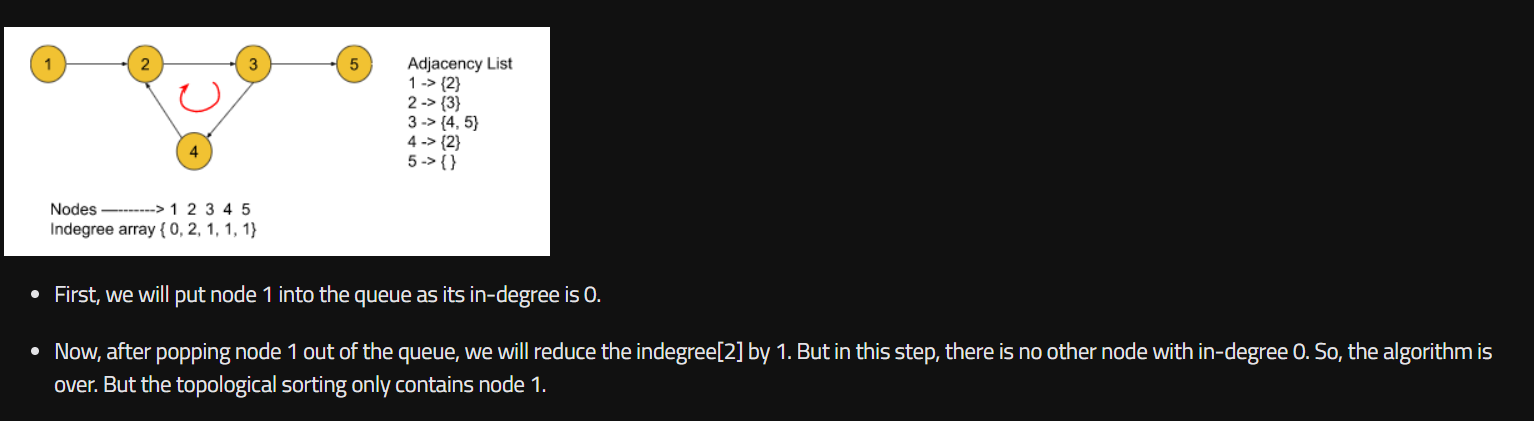

In [2]:
from typing import List
from collections import deque

class Solution:
    
    def isCyclic(self, V : int , adj : List[List[int]]) -> bool :
        indegree = [0]* V    
        
        for i in range(V):       # Create a list containing the count of indegree or incoming edges to the nodes 
            for node in adj[i]:   # so all the neighbours of adj list will have indegree incremented by 1
                indegree[node] += 1
                
        queue = deque()
        
        for i in range(V):    # Again iterate through all vertices , and add it to the Queue if indegree of that vertex is 0
            if indegree[i] == 0:
                queue.append(i)
        
        count = 0  
        while queue:        
            node = queue.popleft()    # Pop the the node and in adj list reduce the indegree of all its neighbour by 1 
            count += 1                            # and in case it becomes 0, add it to the queue
            
            
            # Node is in topo sort , remove it from indegree
            for neighbour in adj[node]:
                indegree[neighbour] -= 1
                if indegree[neighbour] == 0:
                    queue.append(neighbour)
                    
                    
        if count == V:        # If final count of topo sort is equal to V , then there is no cycle 
            return False
        return True           # Otherwise there is a cycle